<a href="https://colab.research.google.com/github/Yasmine-ChemP/GMCtraining/blob/main/Cats_and_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers 
import tensorflow_datasets as tfds
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
#configuration
img_size=(160,160)

In [ ]:
setattr(tfds.image_classification.cats_vs_dogs, '_URL',"https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip")

In [ ]:
(train_ds, test_ds, val_ds),info=tfds.load('cats_vs_dogs', split=['train[0:4000]','train[4000:6000]','train[6000:7000]'],
                       shuffle_files=True,
                       with_info=True,
                       as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteFZFA2G/cats_vs_dogs-train.tfrecord


  0%|          | 0/23262 [00:00<?, ? examples/s]

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


,image,label
0,,0 (cat)
1,,1 (dog)
2,,0 (cat)
3,,1 (dog)
4,,1 (dog)
5,,0 (cat)
6,,1 (dog)
7,,0 (cat)
8,,0 (cat)
9,,0 (cat)

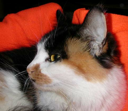
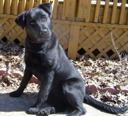
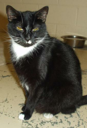
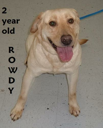
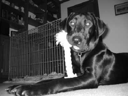
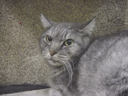
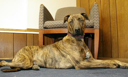
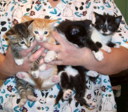
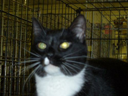
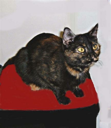
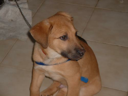
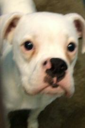
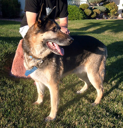
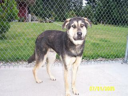
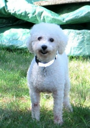
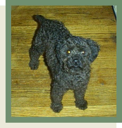
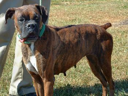
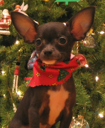
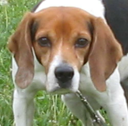
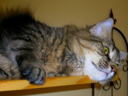

In [ ]:
#Visualiser notre dataset avec pandas.
tfds.as_dataframe(train_ds.take(20),info)

In [ ]:
#construction d'une pipeline d'apprentisage
#normalization
def normalize_img(image, label):
  """Normalizes images: uint8 -> float32."""
  image = tf.image.resize(image,img_size,method='nearest')
  return tf.cast(image, tf.float32) / 255., label


train_ds = train_ds.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
#map : applique sur chaque element la normalisation 
#pour executer on appel la fonction 
train_ds = train_ds.cache()
train_ds = train_ds.shuffle(info.splits['train[0:4000]'].num_examples)
train_ds = train_ds.batch(32)
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)

In [ ]:
#construction du pipeline de validation
val_ds = val_ds.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)

val_ds = val_ds.cache()
val_ds = val_ds.batch(32)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

In [ ]:
#construction du pipeline de test

test_ds = test_ds.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)

test_ds = test_ds.cache()
test_ds = test_ds.batch(32)
test_ds = test_ds.prefetch(tf.data.AUTOTUNE)

In [ ]:
#Construction du model
def build_model():
  input=keras.Input(shape=(img_size[0],img_size[1],3))
  x = layers.Conv2D(32,(3,3),activation='relu', kernel_regularizer='l1')(input)
  x = layers.MaxPooling2D((2,2))(x)
  x = layers.Conv2D(32,(3,3),activation='relu')(x)
  x = layers.MaxPooling2D((2,2))(x)
  x = layers.Conv2D(32,(3,3),activation='relu')(x)
  x = layers.MaxPooling2D((2,2))(x)
  x = layers.Flatten()(x)
  x=layers.Dropout(0.4)(x)
  x = layers.Dense(256,activation='relu')(x)
  x=layers.Dropout(0.4)(x)
  output = layers.Dense(1,activation='sigmoid')(x)
  model = keras.Model(inputs=input,outputs=output)
  return model

model = build_model()

model.summary()


Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 conv2d_22 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 34, 34, 32)        9248

In [ ]:
model.compile(optimizer="Rmsprop", loss="binary_crossentropy", metrics=["accuracy"])


In [ ]:
#model.fit(train_ds,validation_data=(test_ds),epochs=25)

In [ ]:
#Courbe d'apprentissage et de loss
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(25,4)

ax1.plot(model.history.history['accuracy'],'bo')
ax1.plot(model.history.history['val_accuracy'],'g')
ax1.set_title('model accuracy')
ax1.set(xlabel="epoch",ylabel="accuracy")
ax1.legend(['train', 'val'], loc='upper left')

ax2.plot(model.history.history['loss'],'bo')
ax2.plot(model.history.history['val_loss'],'g')
ax2.set_title('model loss')
ax2.set(xlabel="epoch",ylabel="loss")
ax2.legend(['train', 'val'], loc='upper left')

In [ ]:
#evaluation model
test_loss, test_acc = model.evaluate(test_ds, verbose=2)

print('\nTest accuracy:', test_acc *100, '%')

In [ ]:
#Prédiction sur un batch de données.
class_names = np.array(info.features['label'].names)
class_names

image_batch, label_batch = next(iter(test_ds.take(1)))
image_batch = image_batch.numpy()
label_batch = label_batch.numpy()

predicted_batch = model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()

predicted_ids = np.around(predicted_batch,decimals=0).astype(dtype=int)

predicted_class_names = class_names[predicted_ids]
predicted_class_names

In [ ]:
#Représentation en photo.
plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  color = "blue" if predicted_ids[n] == label_batch[n] else "red"
  plt.title(predicted_class_names[n].title(), color=color)
  plt.axis('off')
_= plt.suptitle("Model predictions (blue: correct, red: incorrect)")

In [ ]:
#data augmentation
data_augmentation = keras.Sequential(
  [
   
    layers.RandomFlip("horizontal",
                      input_shape=(150,
                                  150,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
image, label=next(iter(train_ds))
image=image.numpy()

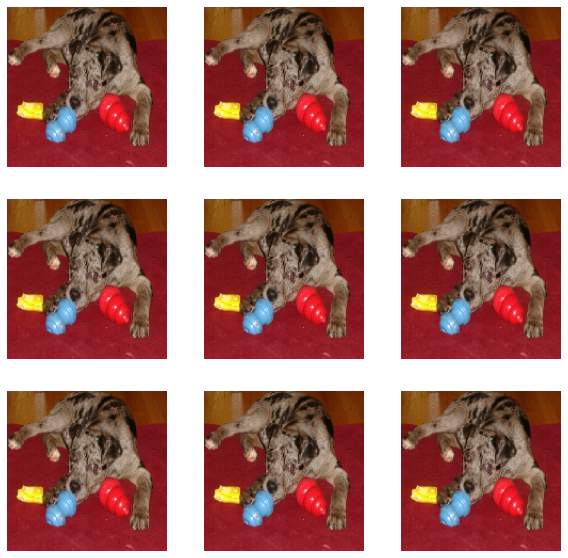

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
  augmented_image=data_augmentation(image)
  ax=plt.subplot(3,3,i+1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [ ]:
#Modéle avec data augmentation
def build_model_data_aug():
  input = keras.Input(shape=(150, 150,3))
  x = data_augmentation(input)
  x = layers.Conv2D(32,(3,3),activation='relu')(x)
  x = layers.MaxPooling2D((2,2))(x)
  x = layers.Conv2D(32,(3,3),activation='relu')(x)
  x = layers.MaxPooling2D((2,2))(x)
  x = layers.Conv2D(32,(3,3),activation='relu')(x)
  x = layers.MaxPooling2D((2,2))(x)
  x = layers.Flatten()(x)
  x = layers.Dropout(0.4)(x)
  x = layers.Dense(256,activation='relu')(x)
  output = layers.Dense(1,activation='sigmoid')(x)
  model = keras.Model(inputs=input,outputs=output)
  return model

model = build_model_data_aug()

In [ ]:
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 sequential_4 (Sequential)   (None, 150, 150, 3)       0         
                                                                 
 conv2d_28 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                     

In [ ]:
model.compile(optimizer="Rmsprop", loss="binary_crossentropy", metrics=["accuracy"])


In [ ]:
model.fit(train_ds,validation_data=(test_ds),epochs=100)

Epoch 1/100
125/125 [==============================] - 11s 76ms/step - loss: 0.7355 - accuracy: 0.5533 - val_loss: 0.6937 - val_accuracy: 0.5420
Epoch 2/100
125/125 [==============================] - 6s 51ms/step - loss: 0.6514 - accuracy: 0.6265 - val_loss: 0.5945 - val_accuracy: 0.6810
Epoch 3/100
125/125 [==============================] - 6s 50ms/step - loss: 0.6227 - accuracy: 0.6530 - val_loss: 0.5846 - val_accuracy: 0.6785
Epoch 4/100
125/125 [==============================] - 6s 50ms/step - loss: 0.5999 - accuracy: 0.6795 - val_loss: 0.6012 - val_accuracy: 0.6605
Epoch 5/100
125/125 [==============================] - 6s 51ms/step - loss: 0.5867 - accuracy: 0.6900 - val_loss: 0.5561 - val_accuracy: 0.7255
Epoch 6/100
125/125 [==============================] - 6s 51ms/step - loss: 0.5651 - accuracy: 0.7015 - val_loss: 0.5641 - val_accuracy: 0.7290
Epoch 7/100
125/125 [==============================] - 7s 53ms/step - loss: 0.5585 - accuracy: 0.7097 - val_loss: 0.5277 - val_accuracy

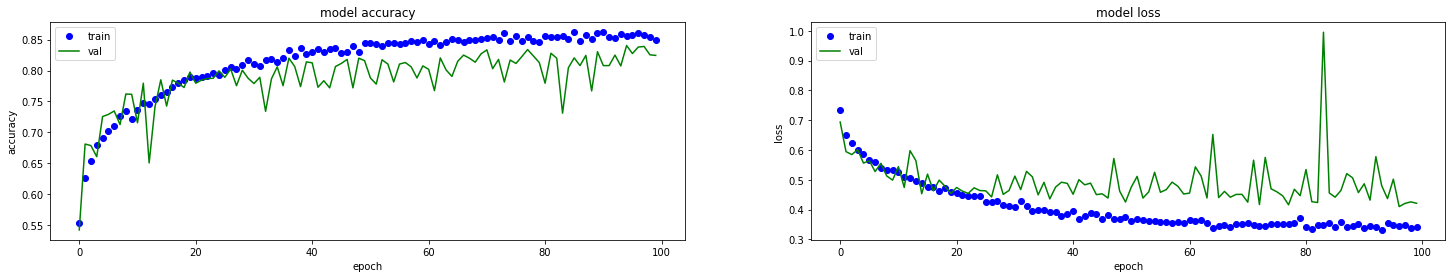

In [ ]:
#Courbe d'apprentissage et de loss
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(25,4)

ax1.plot(model.history.history['accuracy'],'bo')
ax1.plot(model.history.history['val_accuracy'],'g')
ax1.set_title('model accuracy')
ax1.set(xlabel="epoch",ylabel="accuracy")
ax1.legend(['train', 'val'], loc='upper left')

ax2.plot(model.history.history['loss'],'bo')
ax2.plot(model.history.history['val_loss'],'g')
ax2.set_title('model loss')
ax2.set(xlabel="epoch",ylabel="loss")
ax2.legend(['train', 'val'], loc='upper left')

In [ ]:
#evaluation model
test_loss, test_acc = model.evaluate(test_ds, verbose=2)

print('\nTest accuracy:', test_acc *100, '%')

63/63 - 1s - loss: 0.4214 - accuracy: 0.8245 - 1s/epoch - 16ms/step

Test accuracy: 82.4500024318695 %


Partie 2 : Transfert Learning 

In [ ]:
#Transfert learning

from tensorflow.keras.applications.vgg16 import VGG16
#on import que la partie convolutive du vgg net d'ou include_top=false
base_convolutive= VGG16(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(150,150,3)
)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
base_convolutive.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
#geler la couche de convolution , on ne veut pas apprendre la convolution
#on ne va pas changer la representation
#vgg sera utiliser comme un mdel d'extraction de caracterisqiaues , donc on ne va pas lentrainer
# si on ne block pas il va tout reapprendre , donc comme si on repart de 0

base_convolutive.trainable=False

In [ ]:
#Modéle avec transfert learning sans data augmentation.
def build_transfer_model():
  input = keras.Input(shape=(150, 150,3))
  x = base_convolutive(input)
  x = layers.Flatten()(x)
  x = layers.Dense(256,activation='relu')(x)
  x = layers.Dropout(0.4)(x)
  output = layers.Dense(1,activation='sigmoid')(x)
  model = keras.Model(inputs=input,outputs=output)
  return model

model = build_transfer_model() 

In [ ]:
model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_12 (Flatten)        (None, 8192)              0         
                                                                 
 dense_24 (Dense)            (None, 256)               2097408   
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                                 
 dense_25 (Dense)            (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-t

In [ ]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

In [ ]:
model.fit(
    train_ds,
    epochs=25,
    validation_data=test_ds
)

Epoch 1/25
125/125 [==============================] - 35s 254ms/step - loss: 0.5375 - accuracy: 0.7855 - val_loss: 0.2706 - val_accuracy: 0.8770
Epoch 2/25
125/125 [==============================] - 30s 241ms/step - loss: 0.3174 - accuracy: 0.8612 - val_loss: 0.2490 - val_accuracy: 0.8905
Epoch 3/25
125/125 [==============================] - 30s 241ms/step - loss: 0.2654 - accuracy: 0.8835 - val_loss: 0.2567 - val_accuracy: 0.8860
Epoch 4/25
125/125 [==============================] - 30s 241ms/step - loss: 0.2449 - accuracy: 0.8960 - val_loss: 0.2292 - val_accuracy: 0.9045
Epoch 5/25
125/125 [==============================] - 30s 241ms/step - loss: 0.1859 - accuracy: 0.9252 - val_loss: 0.3700 - val_accuracy: 0.8590
Epoch 7/25
125/125 [==============================] - 30s 240ms/step - loss: 0.1717 - accuracy: 0.9310 - val_loss: 0.2564 - val_accuracy: 0.9070
Epoch 8/25
125/125 [==============================] - 30s 241ms/step - loss: 0.1646 - accuracy: 0.9305 - val_loss: 0.2882 - val_ac

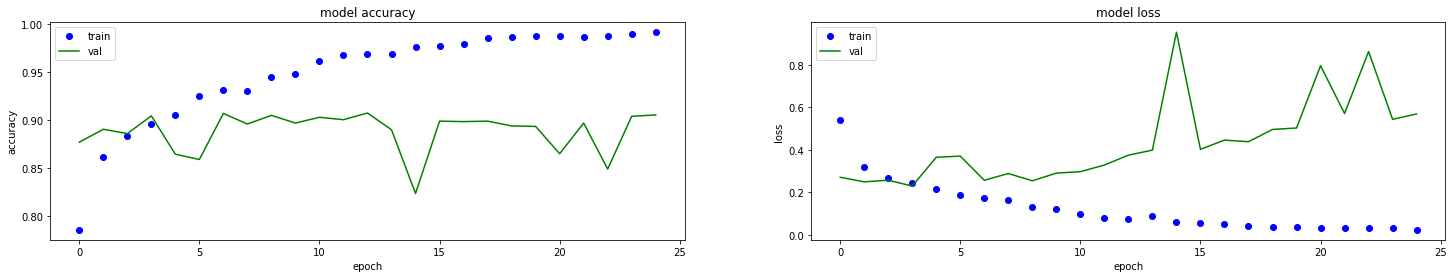

In [ ]:
#Courbe d'apprentissage et de loss
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(25,4)

ax1.plot(model.history.history['accuracy'],'bo')
ax1.plot(model.history.history['val_accuracy'],'g')
ax1.set_title('model accuracy')
ax1.set(xlabel="epoch",ylabel="accuracy")
ax1.legend(['train', 'val'], loc='upper left')

ax2.plot(model.history.history['loss'],'bo')
ax2.plot(model.history.history['val_loss'],'g')
ax2.set_title('model loss')
ax2.set(xlabel="epoch",ylabel="loss")
ax2.legend(['train', 'val'], loc='upper left')

In [ ]:
#evaluation model
test_loss, test_acc = model.evaluate(test_ds, verbose=2)

print('\nTest accuracy:', test_acc *100, '%')

63/63 - 10s - loss: 0.5683 - accuracy: 0.9055 - 10s/epoch - 156ms/step

Test accuracy: 90.54999947547913 %


In [ ]:
#transfert learning with data augmentation
#Modéle avec transfert learning avec data augmentation.
def build_transfer_model_aug():
  input = keras.Input(shape=(150, 150,3))
  x = data_augmentation(input)
  x = base_convolutive(x)
  x = layers.Flatten()(x)
  x = layers.Dense(256,activation='relu')(x)
  x = layers.Dropout(0.4)(x)
  output = layers.Dense(1,activation='sigmoid')(x)
  model = keras.Model(inputs=input,outputs=output)
  return model

model = build_transfer_model_aug()

In [ ]:
model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 150, 150, 3)]     0         
                                                                 
 sequential_4 (Sequential)   (None, 150, 150, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_13 (Flatten)        (None, 8192)              0         
                                                                 
 dense_26 (Dense)            (None, 256)               2097408   
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 1)                 257

In [ ]:
model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

In [ ]:
model.fit(
    train_ds,
    epochs=100,
    validation_data=test_ds
)

Epoch 1/100
125/125 [==============================] - 32s 248ms/step - loss: 0.7162 - accuracy: 0.7272 - val_loss: 0.2789 - val_accuracy: 0.8900
Epoch 2/100
125/125 [==============================] - 31s 245ms/step - loss: 0.4103 - accuracy: 0.8130 - val_loss: 0.2622 - val_accuracy: 0.8880
Epoch 3/100
125/125 [==============================] - 30s 244ms/step - loss: 0.3679 - accuracy: 0.8338 - val_loss: 0.3325 - val_accuracy: 0.8565
Epoch 4/100
125/125 [==============================] - 31s 245ms/step - loss: 0.3338 - accuracy: 0.8553 - val_loss: 0.3079 - val_accuracy: 0.8605
Epoch 5/100
125/125 [==============================] - 30s 244ms/step - loss: 0.3322 - accuracy: 0.8577 - val_loss: 0.2482 - val_accuracy: 0.8965
Epoch 6/100
125/125 [==============================] - 30s 244ms/step - loss: 0.3234 - accuracy: 0.8572 - val_loss: 0.2590 - val_accuracy: 0.8870
Epoch 7/100
125/125 [==============================] - 30s 244ms/step - loss: 0.3185 - accuracy: 0.8600 - val_loss: 0.2931 -

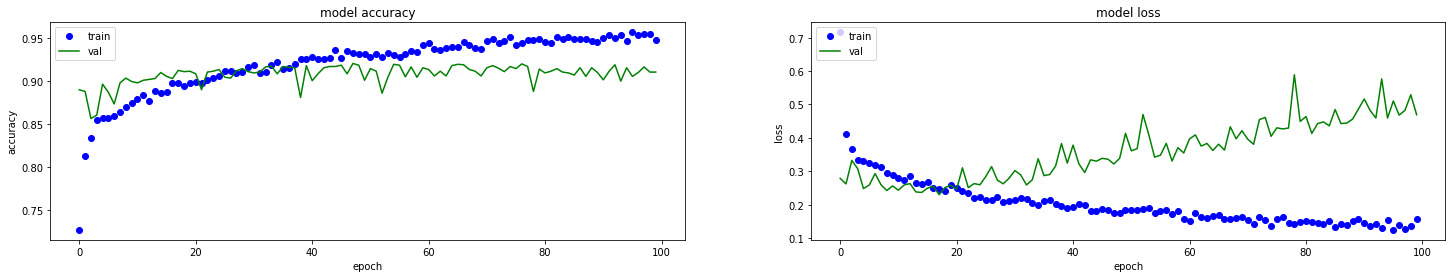

In [ ]:
#Courbe d'apprentissage et de loss
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(25,4)

ax1.plot(model.history.history['accuracy'],'bo')
ax1.plot(model.history.history['val_accuracy'],'g')
ax1.set_title('model accuracy')
ax1.set(xlabel="epoch",ylabel="accuracy")
ax1.legend(['train', 'val'], loc='upper left')

ax2.plot(model.history.history['loss'],'bo')
ax2.plot(model.history.history['val_loss'],'g')
ax2.set_title('model loss')
ax2.set(xlabel="epoch",ylabel="loss")
ax2.legend(['train', 'val'], loc='upper left')

In [ ]:
#evaluation model
test_loss, test_acc = model.evaluate(test_ds, verbose=2)

print('\nTest accuracy:', test_acc *100, '%')

63/63 - 10s - loss: 0.4693 - accuracy: 0.9105 - 10s/epoch - 155ms/step

Test accuracy: 91.04999899864197 %


In [ ]:
#Fine tuning 
#la derniere etape du transfert learninng
#reentrainer l'integralité du model
#mais ca risque de prendre bcp de temps
model.trainable=True

In [ ]:
model.fit(
    train_ds,
    epochs=7,
    validation_data=test_ds
)
#linteret est de combler la marge , et afiner la representation et ameliorer la classification
#

Epoch 1/7
125/125 [==============================] - 30s 244ms/step - loss: 0.1353 - accuracy: 0.9567 - val_loss: 0.4550 - val_accuracy: 0.9150
Epoch 2/7
125/125 [==============================] - 30s 243ms/step - loss: 0.1278 - accuracy: 0.9535 - val_loss: 0.4606 - val_accuracy: 0.9110
Epoch 3/7
125/125 [==============================] - 30s 243ms/step - loss: 0.1321 - accuracy: 0.9563 - val_loss: 0.5798 - val_accuracy: 0.9050
Epoch 4/7
125/125 [==============================] - 30s 243ms/step - loss: 0.1420 - accuracy: 0.9550 - val_loss: 0.4896 - val_accuracy: 0.9105
Epoch 5/7
125/125 [==============================] - 30s 243ms/step - loss: 0.1228 - accuracy: 0.9572 - val_loss: 0.5064 - val_accuracy: 0.9115
Epoch 6/7
125/125 [==============================] - 30s 243ms/step - loss: 0.1309 - accuracy: 0.9542 - val_loss: 0.5018 - val_accuracy: 0.9135
Epoch 7/7
125/125 [==============================] - 30s 243ms/step - loss: 0.1327 - accuracy: 0.9555 - val_loss: 0.5008 - val_accuracy:

In [ ]:
#evaluation model
test_loss, test_acc = model.evaluate(test_ds, verbose=2)

print('\nTest accuracy:', test_acc *100, '%')

63/63 - 10s - loss: 0.5008 - accuracy: 0.9115 - 10s/epoch - 156ms/step

Test accuracy: 91.14999771118164 %


In [ ]:
#to do 
#add dropout 0.2, 0.3, 0.4
#jouer sur le nombre input
#jouer sur la fct dactivation , opt ,loss , nbr epochs
#jouer sur les couches , data augmentation
#ajouter d'autres fonctions de data augmentation ( look in tensorflow doc)
# data augm endomage la qualité des images , se limiter a 4 transformations

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model=InceptionV3( include_top=False, input_shape=((150,150,3)))


87924736/87910968 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                       

In [ ]:
#mobilenet
from tensorflow.keras.applications.mobilenet import MobileNet
base_model= MobileNet(include_top= False, input_shape=(160,160,3))


In [ ]:
base_model.summary()

In [ ]:
base_model.trainable= False
def build_mobilenet_transfer():
  input= layers.Input(shape=(160,160,3))
  x=base_model(input)
  x=layers.Flatten()(x)
  x=layers.Dense(256, activation ='relu')(x)
  output=layers.Dense(1, activation='sigmoid')(x)
  model= keras.Model(inputs=input, outputs=output)
  return model

model= build_mobilenet_transfer()

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_ds, epochs=20,validation_data= val_ds)

In [ ]:
#resnet
from tensorflow.keras.applications.resnet50 import ResNet50
base_model= ResNet50(include_top=False, input_shape=(150,150,3) )
base_model.summary()

94781440/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 156, 156, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 75, 75, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalizat